<a href="https://colab.research.google.com/github/luisdiaz1997/BadNetwork/blob/master/ResidualAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, UpSampling2D, MaxPooling2D, AveragePooling2D, Input, Conv2DTranspose, Add

In [0]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###
    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = X = Add()([X, X_shortcut])
    X = Activation('tanh')(X)
    
    ### END CODE HERE ###
    
    return X

In [0]:
def identity_transpose_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2DTranspose(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###
    
    # Second component of main path (≈3 lines)
    X = Conv2DTranspose(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2DTranspose(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = X = Add()([X, X_shortcut])
    X = Activation('tanh')(X)
    
    ### END CODE HERE ###
    
    return X

In [0]:
def convolutional_block(X, f, filters, stage, block, s=2):
    """
    Implementation of the convolutional block as defined in Figure 4

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used

    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    ### END CODE HERE ###
    return X

In [0]:
def convolutional_transpose_block(X, f, filters, stage, block, s=2):
    """
    Implementation of the convolutional block as defined in Figure 4

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used

    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2DTranspose(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2DTranspose(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2DTranspose(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2DTranspose(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    ### END CODE HERE ###
    return X

In [0]:
def build_encoder():
    inp= Input(shape= (32, 32, 3))
    
    x = convolutional_block(inp, f = 3, filters = [16, 16, 64], stage = 1, block = 'a', s=2)
    x = identity_block(x, f =3, filters = [16, 16, 64], stage = 1, block = 'b')
    x = identity_block(x, f =3, filters = [16, 16, 64], stage = 1, block = 'c')
    x = identity_block(x, f =3, filters = [16, 16, 64], stage = 1, block = 'd')

    x = convolutional_block(x, f = 3, filters = [32, 32, 128], stage = 2, block = 'a', s=2)
    x = identity_block(x, f =3, filters = [32, 32, 128], stage = 2, block = 'b')
    x = identity_block(x, f =3, filters = [32, 32, 128], stage = 2, block = 'c')

    
    x = convolutional_block(x, f = 3, filters = [64, 64, 256], stage = 3, block = 'a', s=2)
    x = identity_block(x, f =3, filters = [64, 64, 256], stage = 3, block = 'b')



    
    x = BatchNormalization()(x)

    #x = Activation('tanh')(x)
    


    
    model = Model(inp, x)
    return model

In [0]:
def build_decoder():
    inp = Input(shape= (4, 4, 256))



    x = convolutional_transpose_block(inp, f = 3, filters = [64, 64, 128], stage = 6, block = 'a', s=2)
    x = identity_transpose_block(x, f = 3, filters = [64, 64, 128], stage = 6, block = 'b')



    x = convolutional_transpose_block(x, f = 3, filters = [32, 32, 64], stage = 7, block = 'a', s=2)
    x = identity_transpose_block(x, f = 3, filters = [32, 32, 64], stage = 7, block = 'b')
    x = identity_transpose_block(x, f = 3, filters = [32, 32, 64], stage = 7, block = 'c')


    x = convolutional_transpose_block(x, f = 3, filters = [16, 16, 3], stage = 8, block = 'a', s=2)
    x = identity_transpose_block(x, f = 3, filters = [16, 16, 3], stage = 8, block = 'b')
    x = identity_transpose_block(x, f = 3, filters = [16, 16, 3], stage = 8, block = 'c')
    x = identity_transpose_block(x, f = 3, filters = [16, 16, 3], stage = 8, block = 'd')
    
    

    x = Activation('relu')(x)



    
    model = Model(inp, x)
    return model

In [0]:
(x_train, y_train), (x_test, y_test)= keras.datasets.cifar10.load_data()
x_train= (x_train)/255.0
x_test= (x_test)/255.0

In [97]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
encoder = build_encoder()

In [99]:
encoder.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
res1a_branch2a (Conv2D)         (None, 16, 16, 16)   64          input_15[0][0]                   
__________________________________________________________________________________________________
bn1a_branch2a (BatchNormalizati (None, 16, 16, 16)   64          res1a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_330 (Activation)     (None, 16, 16, 16)   0           bn1a_branch2a[0][0]              
___________________________________________________________________________________________

In [0]:
decoder = build_decoder()

In [101]:
decoder.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 4, 4, 256)]  0                                            
__________________________________________________________________________________________________
res6a_branch2a (Conv2DTranspose (None, 8, 8, 64)     16448       input_16[0][0]                   
__________________________________________________________________________________________________
bn6a_branch2a (BatchNormalizati (None, 8, 8, 64)     256         res6a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_357 (Activation)     (None, 8, 8, 64)     0           bn6a_branch2a[0][0]              
___________________________________________________________________________________________

In [0]:
autoencoder = Sequential([encoder, decoder])

In [103]:
autoencoder.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_13 (Model)             (None, 4, 4, 256)         250736    
_________________________________________________________________
model_14 (Model)             (None, 32, 32, 3)         214555    
Total params: 465,291
Trainable params: 457,965
Non-trainable params: 7,326
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer= 'adam', loss = 'MSE', metrics = ['accuracy'])

In [124]:
autoencoder.fit(x_train, x_train, epochs =20, batch_size= 1000)

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 32s 640us/sample - loss: 0.0031 - acc: 0.8298
Epoch 2/20
50000/50000 [==============================] - 32s 639us/sample - loss: 0.0031 - acc: 0.8288
Epoch 3/20
50000/50000 [==============================] - 32s 641us/sample - loss: 0.0031 - acc: 0.8300
Epoch 4/20
50000/50000 [==============================] - 32s 640us/sample - loss: 0.0031 - acc: 0.8291
Epoch 5/20
50000/50000 [==============================] - 32s 641us/sample - loss: 0.0031 - acc: 0.8305
Epoch 6/20
50000/50000 [==============================] - 32s 640us/sample - loss: 0.0031 - acc: 0.8307
Epoch 7/20
50000/50000 [==============================] - 32s 640us/sample - loss: 0.0031 - acc: 0.8317
Epoch 8/20
50000/50000 [==============================] - 32s 640us/sample - loss: 0.0031 - acc: 0.8297
Epoch 9/20
50000/50000 [==============================] - 32s 641us/sample - loss: 0.0031 - acc: 0.8308
Epoch 10/20
50000/50000 [================

In [0]:
x_train_r = autoencoder.predict(x_train[::100])
x_test_r = autoencoder.predict(x_test)

In [129]:
x_test_r.shape

(10000, 32, 32, 3)

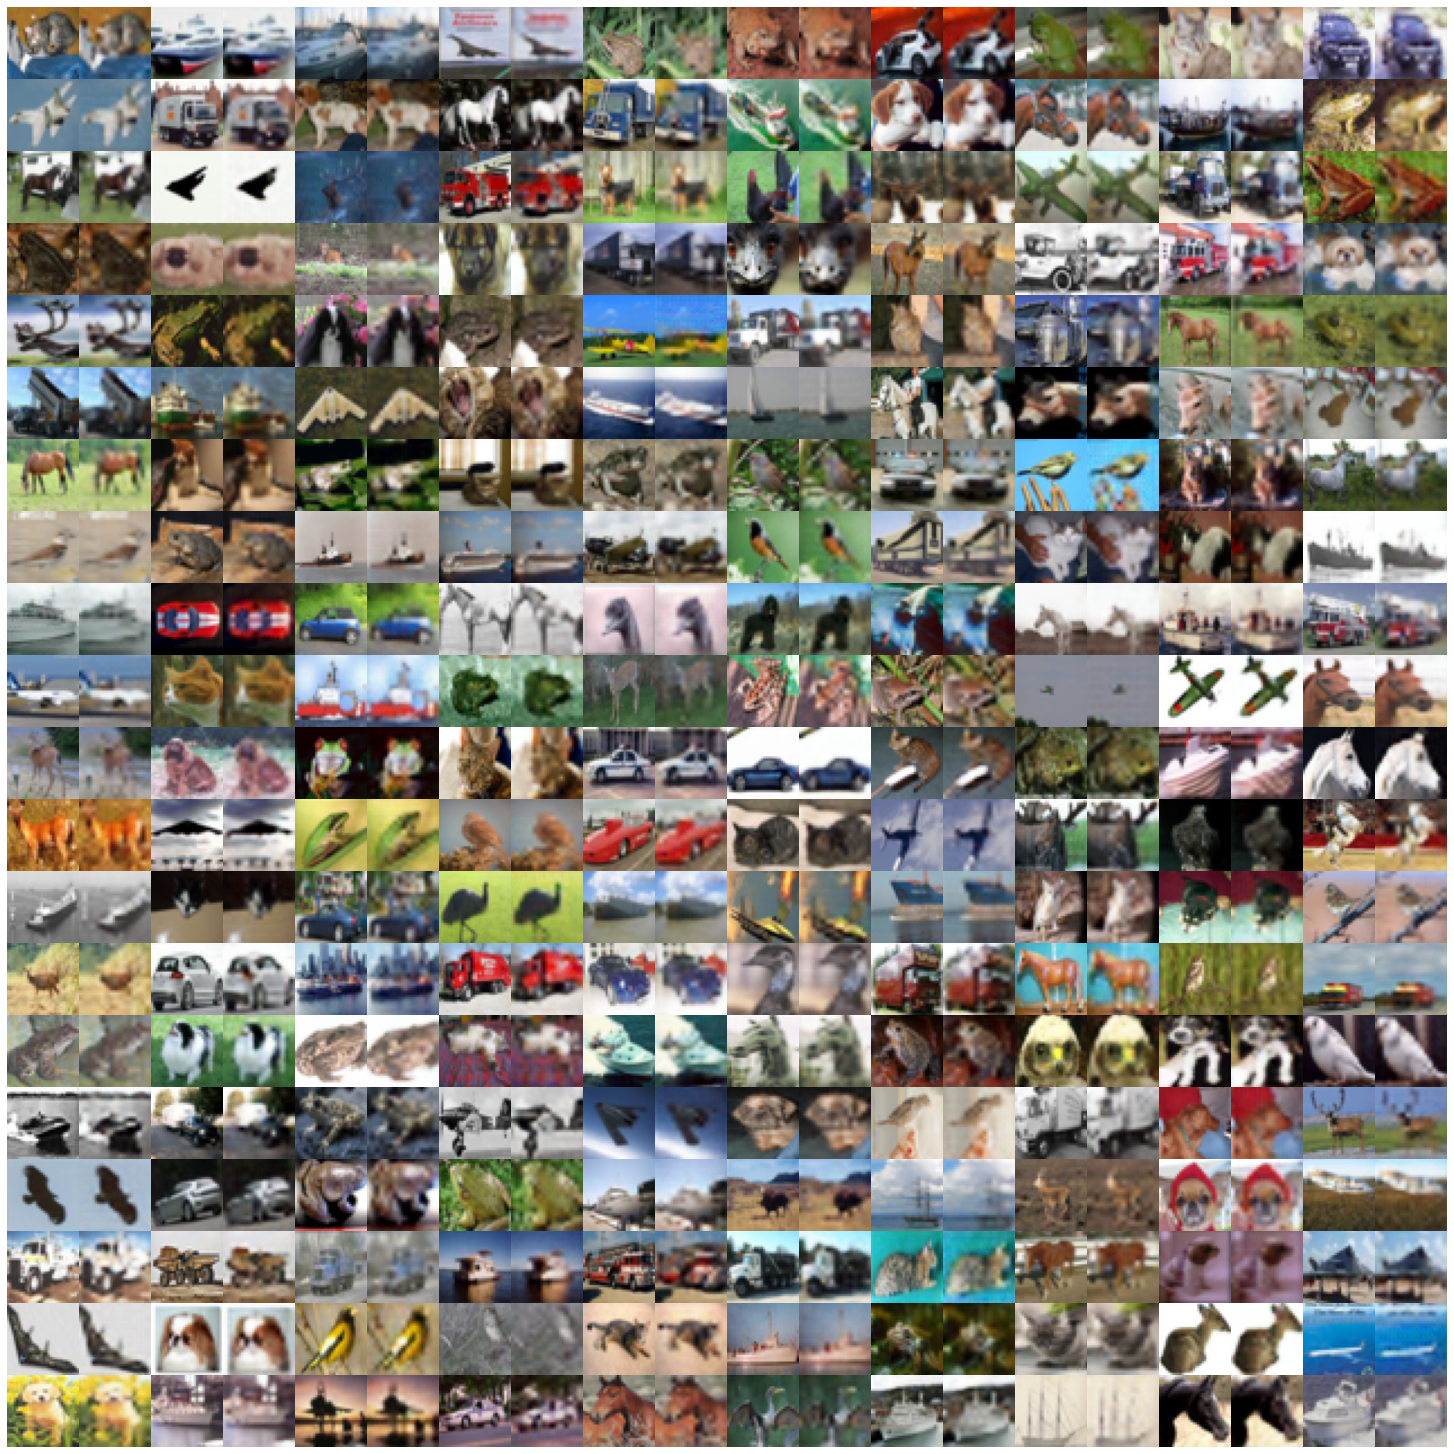

<Figure size 432x288 with 0 Axes>

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
for i in range(200):
  plt.subplot(20, 20, (2*i)+1)
  plt.imshow(x_test[i], cmap= 'gray')

  plt.axis("off")   # turns off axes
  plt.axis("tight")  # gets rid of white border
  plt.axis("image")

  plt.subplot(20, 20, (2*i)+2)
  plt.imshow(x_test_r[i], cmap= 'gray')

  plt.axis("off")   # turns off axes
  plt.axis("tight")  # gets rid of white border
  plt.axis("image")

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
plt.show()



plt.savefig("test.png")


<Figure size 432x288 with 0 Axes>